## Importações

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Lendo dataset

In [3]:
df = pd.read_csv('CompanhiaMB.csv')

### Variáveis

- funcionario
- estado_civil
- instrucao
- nfilhos
- salario
- idade_anos
- idade_meses
- regiao

## Estado civil
- Duas possibilidades (Casado/Solteiro)
- Sem dados nulos
- Gráfico de pizza

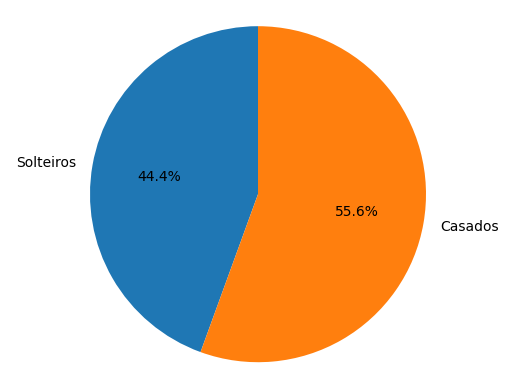

In [14]:
df = pd.read_csv('CompanhiaMB.csv')
solteiros = df[df['estado_civil'] == 'solteiro'].count()['funcionario']
casados = df[df['estado_civil'] == 'casado'].count()['funcionario']

labels = ['Solteiros', 'Casados']
sizes = [solteiros, casados]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


- A maioria dos funcionários são casados(as)

## Grau de Instrução
- Três possibilidades (Fundamental/Médio/Superior)
- Sem dados nulos
- Gráfico de pizza

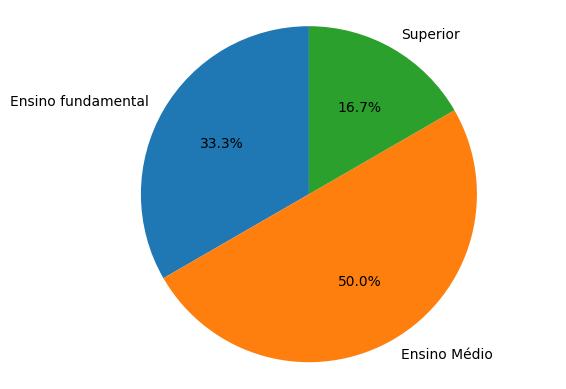

In [15]:
df = pd.read_csv('CompanhiaMB.csv')
ensino_fundamental = df[df['instrucao'] == 'ensino_fundamental'].count()['funcionario']
ensino_medio = df[df['instrucao'] == 'ensino_medio'].count()['funcionario']
superior = df[df['instrucao'] == 'superior'].count()['funcionario']

labels = ['Ensino fundamental', 'Ensino Médio', 'Superior']
sizes = [ensino_fundamental, ensino_medio, superior]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

- Metade dos funcionários possuem ATÉ o ensino médio
- 33.3% dos funcionários terem até o Ensino Fundamental é um número alto nos dias atuais, onde a educação está mais acessível. 
- Essas informações serão analisadas mais corretamente abaixo quando a variável IDADE e REGIÃO entrar nos gráficos

## Número de Filhos
- Várias possibilidades
- Com dados nulos
- 1 gráfico de barras com os valores brutos (contendo nulos)
- 1 gráfico de barras retirando os valores nulos
- 1 boxplot para identificar valores muito distantes da média (removendo nulos)

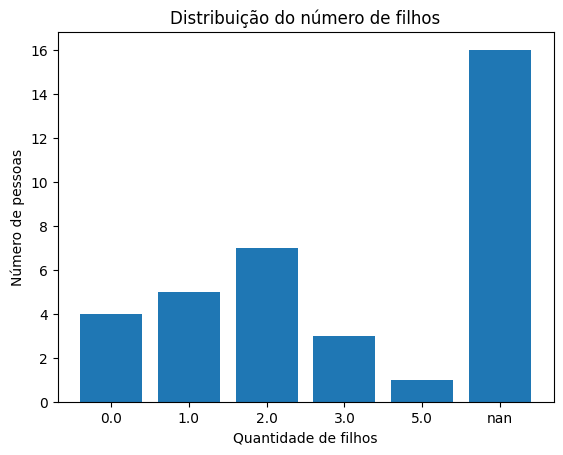

In [17]:
df = pd.read_csv('CompanhiaMB.csv')
filhos = df['nfilhos'].value_counts(dropna=False).sort_index()

plt.bar(filhos.index.astype(str), filhos.values)
plt.xlabel('Quantidade de filhos')
plt.ylabel('Número de pessoas')
plt.title('Distribuição do número de filhos')
plt.show()


- Base com muitos valores nulos

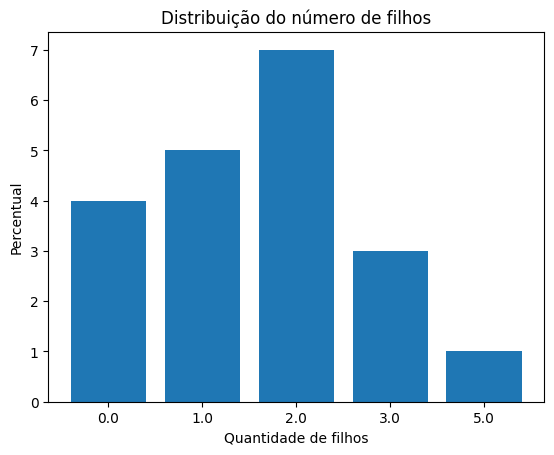

In [27]:
# TIRANDO OS NULOS DO GRÁFICO

df = pd.read_csv('CompanhiaMB.csv')
df.dropna(subset=['nfilhos'], inplace=True)
filhos = df['nfilhos'].value_counts().sort_index()

plt.bar(filhos.index.astype(str), filhos.values)
plt.xlabel('Quantidade de filhos')
plt.ylabel('Percentual')
plt.title('Distribuição do número de filhos')
plt.show()


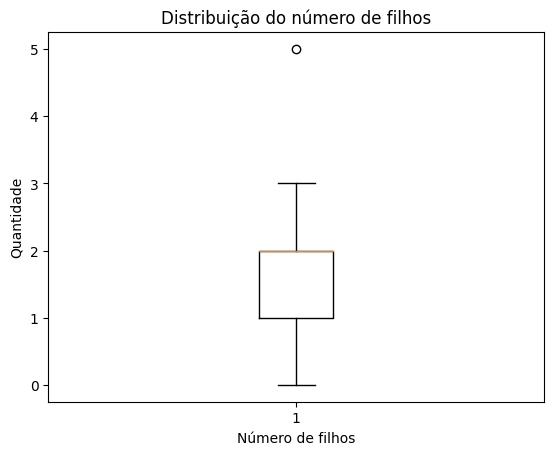

In [31]:
df = pd.read_csv('CompanhiaMB.csv')
df.dropna(subset=['nfilhos'], inplace=True)

fig, ax = plt.subplots()
ax.boxplot(df['nfilhos'])
ax.set_xlabel('Número de filhos')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição do número de filhos')
plt.show()


- Média de 2 filhos
- O funcionário com 5 filhos é um outlier

## Salário
- Várias possibilidades
- Sem dados nulos
- 1 boxplot para identificar valores muito distantes da média

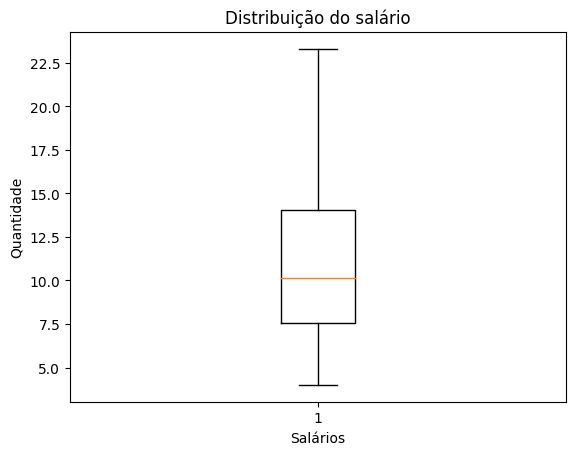

In [34]:
df = pd.read_csv('CompanhiaMB.csv')

fig, ax = plt.subplots()
ax.boxplot(df['salario'])
ax.set_xlabel('Salários')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição do salário')
plt.show()

- Média na casa dos 10 salários
- Sem outliers

## Idade

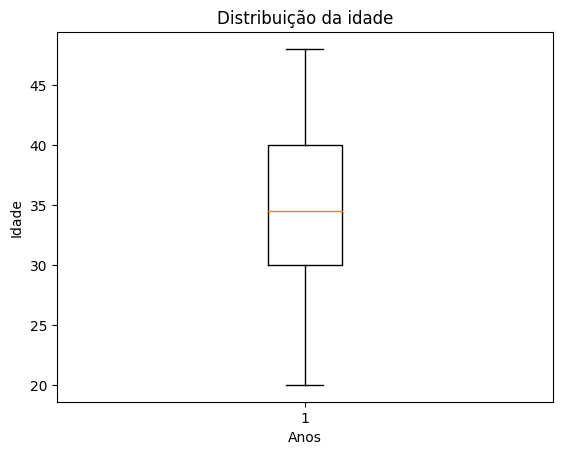

In [35]:
df = pd.read_csv('CompanhiaMB.csv')

fig, ax = plt.subplots()
ax.boxplot(df['idade_anos'])
ax.set_xlabel('Anos')
ax.set_ylabel('Idade')
ax.set_title('Distribuição da idade')
plt.show()

- Média de 35 anos
- Sem outliers

## Região

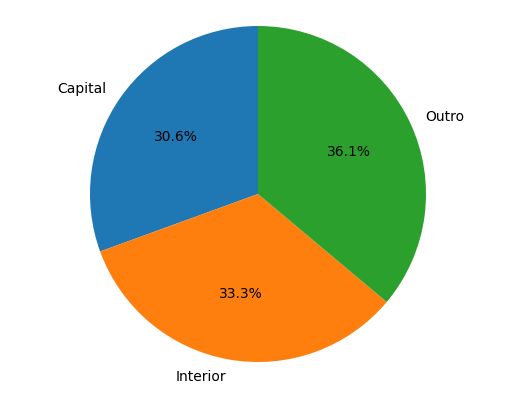

In [36]:
df = pd.read_csv('CompanhiaMB.csv')
capital = df[df['regiao'] == 'capital'].count()['funcionario']
interior = df[df['regiao'] == 'interior'].count()['funcionario']
outro = df[df['regiao'] == 'outro'].count()['funcionario']

labels = ['Capital', 'Interior', 'Outro']
sizes = [capital, interior, outro]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

- A distribuição dos funcionários é bem equilibrada. 1/3 na capital. 1/3 no interior. 1/3 em outros.

## Estado Civil x Número de Flhos

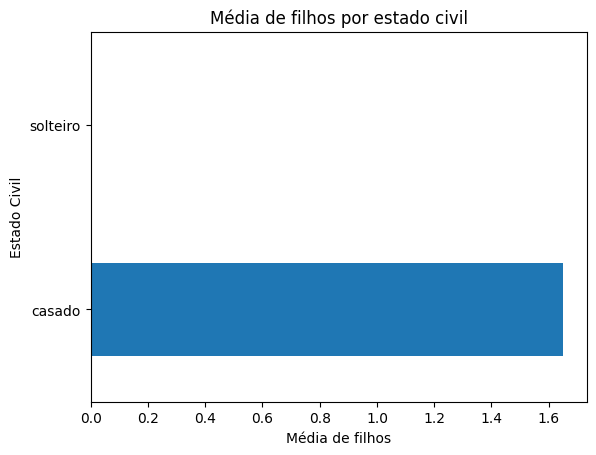

In [41]:
df = pd.read_csv('CompanhiaMB.csv')
mean_filhos_por_estado_civil = df.groupby('estado_civil')['nfilhos'].mean()

fig, ax = plt.subplots()
mean_filhos_por_estado_civil.plot(kind='barh', ax=ax)
ax.set_xlabel('Média de filhos')
ax.set_ylabel('Estado Civil')
ax.set_title('Média de filhos por estado civil')
plt.show()


- Nenhum solteiro tem filhos

## Instrução X Idade

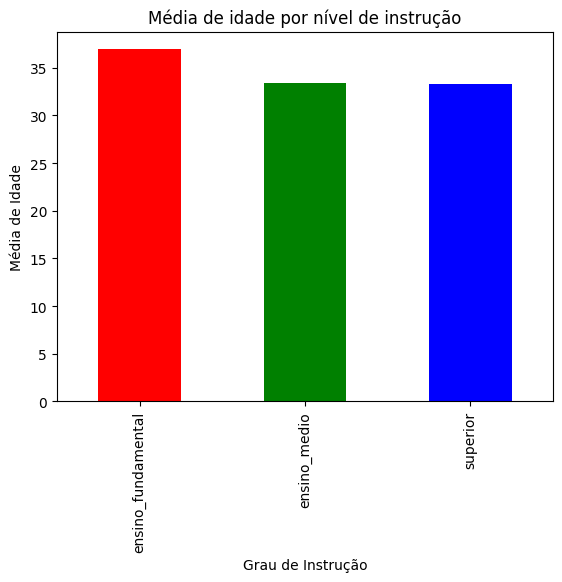

In [42]:
df = pd.read_csv('CompanhiaMB.csv')

media_por_grau = df.groupby('instrucao')['idade_anos'].mean()

fig, ax = plt.subplots()
media_por_grau.plot(kind='bar', color=['red', 'green', 'blue'], ax=ax)
ax.set_xlabel('Grau de Instrução')
ax.set_ylabel('Média de Idade')
ax.set_title('Média de idade por nível de instrução')
plt.show()


- A média de idades por grau de instrução é similar entre os 3 grupos.
- O grupo de ensino fundamental, a média de idade é apenas um pouco maior.

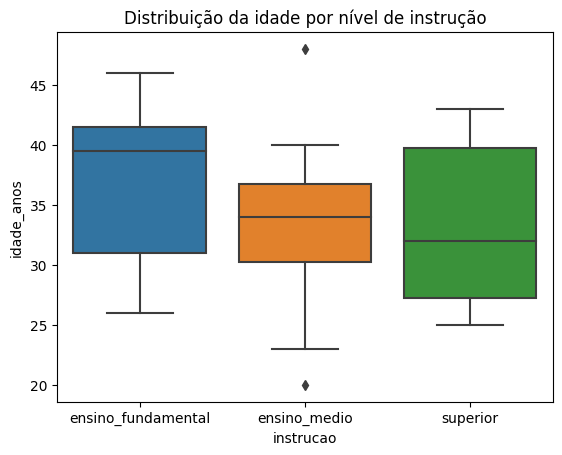

In [45]:
df = pd.read_csv('CompanhiaMB.csv')

# Criar o boxplot:
sns.boxplot(x='instrucao', y='idade_anos', data=df)
plt.title('Distribuição da idade por nível de instrução')
plt.show()


- Aqui identificamos alguns outliers
- No grupo das pessoas com grau de instrução até o ensino médio, tem dois outliers, um para cima e outro para baixo.

In [46]:
df = pd.read_csv('CompanhiaMB.csv')

# Calcular a moda das idades por grupo:
modas_por_grupo = df.groupby('estado_civil')['idade_anos'].apply(lambda x: x.mode()[0]).reset_index()

print(modas_por_grupo)


  estado_civil  idade_anos
0       casado          30
1     solteiro          37
